In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
sns.set()

# Import and Data Overview

In [26]:
# Importing data
recalls_path= "practice_data/recalls.csv"
df=pd.read_csv(recalls_path)

General information about the Recalls data set

In [27]:
#Information on all fields of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   start_date                1338 non-null   object 
 1   end_date                  1171 non-null   object 
 2   id                        1338 non-null   object 
 3   title                     1338 non-null   object 
 4   url                       1338 non-null   object 
 5   reasons                   1057 non-null   object 
 6   status                    1338 non-null   object 
 7   risk_level                1238 non-null   object 
 8   establishment_id          714 non-null    object 
 9   establishment_slug        714 non-null    object 
 10  establishment_name        714 non-null    object 
 11  establishment_address     714 non-null    object 
 12  establishment_telephone   713 non-null    object 
 13  establishment_grant_date  714 non-null    object 
 14  establis

In [28]:
# Sample of data structure
df.head()

,start_date,end_date,id,title,url,reasons,status,risk_level,establishment_id,establishment_slug,establishment_name,establishment_address,establishment_telephone,establishment_grant_date,establishment_activities,quantity_recovered,quantity_unit,states
0,2010-01-09,2012-06-03,001-2010,California Firm Recalls Pork Skin Products Due...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Misbranding, Unreported Allergens",Closed,High,M525+P2854,rudolph-foods-company-inc,Rudolph Foods Company Inc.,"920 West 4th Street Beaumont, CA 92223",(909) 388-2202,2016-08-01,"Meat Processing, Poultry Processing",117.0,pounds,California
1,2010-01-11,2013-06-03,002-2010,Massachusetts Firm Recalls Beef Products Due t...,https://www.fsis.usda.gov/recalls-alerts/massa...,Product Contamination,Closed,High,M5497+V5497,adams-farm-slaughterhouse-llc,Adams Farm Slaughterhouse LLC,"854 Bearsden Rd Athol, MA 1331",(978) 249-9441,2022-02-17,"Meat Processing, Meat Slaughter, Voluntary Pro...",1391.0,pounds,Massachusetts
2,2010-01-15,2013-06-03,003-2010,New York Firm Recalls Beef Carcass That Contai...,https://www.fsis.usda.gov/recalls-alerts/new-y...,Product Contamination,Closed,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.0,pounds,New York
3,2010-01-18,2013-06-03,004-2010,California Firm Recalls Beef Products Due to P...,https://www.fsis.usda.gov/recalls-alerts/calif...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277604.0,pounds,California
4,2010-01-20,2013-06-03,005-2010,Indiana Firm Recalls Frozen Chicken Pot Pie Pr...,https://www.fsis.usda.gov/recalls-alerts/india...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,pounds,"Delaware, Florida, Illinois, Indiana, Iowa, Ke..."


In [29]:
# Manipulation of date field to convert from str format to datetime 
df['start_date']= pd.to_datetime(df['start_date'])
df['end_date']= pd.to_datetime(df['end_date'])
#creating a year and month column for the starting year and beginning month of each recall
df["start_year"]= df["start_date"].dt.year
df["start_month"]= df["start_date"].dt.month
df

,start_date,end_date,id,title,url,reasons,status,risk_level,establishment_id,establishment_slug,establishment_name,establishment_address,establishment_telephone,establishment_grant_date,establishment_activities,quantity_recovered,quantity_unit,states,start_year,start_month
0,2010-01-09,2012-06-03,001-2010,California Firm Recalls Pork Skin Products Due...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Misbranding, Unreported Allergens",Closed,High,M525+P2854,rudolph-foods-company-inc,Rudolph Foods Company Inc.,"920 West 4th Street Beaumont, CA 92223",(909) 388-2202,2016-08-01,"Meat Processing, Poultry Processing",117.0,pounds,California,2010,1
1,2010-01-11,2013-06-03,002-2010,Massachusetts Firm Recalls Beef Products Due t...,https://www.fsis.usda.gov/recalls-alerts/massa...,Product Contamination,Closed,High,M5497+V5497,adams-farm-slaughterhouse-llc,Adams Farm Slaughterhouse LLC,"854 Bearsden Rd Athol, MA 1331",(978) 249-9441,2022-02-17,"Meat Processing, Meat Slaughter, Voluntary Pro...",1391.0,pounds,Massachusetts,2010,1
2,2010-01-15,2013-06-03,003-2010,New York Firm Recalls Beef Carcass That Contai...,https://www.fsis.usda.gov/recalls-alerts/new-y...,Product Contamination,Closed,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.0,pounds,New York,2010,1
3,2010-01-18,2013-06-03,004-2010,California Firm Recalls Beef Products Due to P...,https://www.fsis.usda.gov/recalls-alerts/calif...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277604.0,pounds,California,2010,1
4,2010-01-20,2013-06-03,005-2010,Indiana Firm Recalls Frozen Chicken Pot Pie Pr...,https://www.fsis.usda.gov/recalls-alerts/india...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,pounds,"Delaware, Florida, Illinois, Indiana, Iowa, Ke...",2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2022-09-23,NaT,033-2022,Empanadas Valrico Inc. Recalls Beef and Chicke...,https://www.fsis.usda.gov/recalls-alerts/empan...,Produced Without Benefit of Inspection,Active,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
1334,2022-09-24,NaT,034-2022,Behrmann Meat and Processing Inc. Recalls Vari...,https://www.fsis.usda.gov/recalls-alerts/behrm...,Product Contamination,Active,High,M20917,behrmann-meat-processing-inc,"Behrmann Meat & Processing, Inc.","303 E. St. Rt. 161 Albers, IL 62215",(618) 248-5151,2003-04-25,"Meat Processing, Meat Slaughter",NaN,NaN,NaN,2022,9
1335,2022-10-01,NaT,PHA-10012022-01,FSIS Issues Public Health Alert for Ready-To-E...,https://www.fsis.usda.gov/recalls-alerts/fsis-...,Product Contamination,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minnesota,2022,10
1336,2022-10-13,NaT,PHA-10132022-01,FSIS Issues Public Health Alert for Ground Be...,https://www.fsis.usda.gov/recalls-alerts/fsis-...,Product Contamination,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,10


# Analysis

2015    161
2017    145
2016    138
2018    133
2019    130
2011    109
2014     98
2012     89
2013     89
2010     74
2021     62
2022     58
2020     52
Name: start_year, dtype: int64


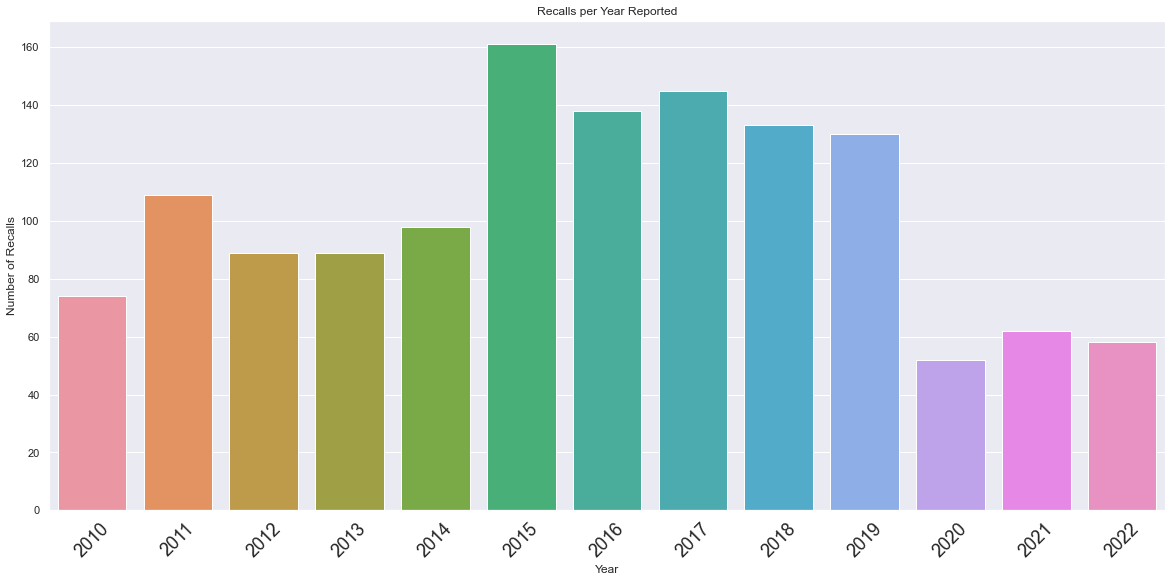

In [30]:
#Analysis of the amount of recalls per year
yearly= df["start_year"]
print(yearly.value_counts())
#plot 
plt.figure(figsize=(20,9))
sns.countplot(x=df['start_year'])
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Year")
plt.ylabel("Number of Recalls")
plt.title("Recalls per Year Reported")
plt.show()

This figure shows the year with the greatest amount of recalls was 2015 with over 160 filed in that year

In [31]:
#Analyzing the the length of time between Start & End Dates of recalls
df["date_difference"]= df['end_date']-df['start_date']
df['date_difference'].describe()

count                           1171
mean     324 days 19:25:46.370623400
std      292 days 18:31:30.845905908
min              -282 days +00:00:00
25%                 78 days 12:00:00
50%                246 days 00:00:00
75%                479 days 00:00:00
max               1815 days 00:00:00
Name: date_difference, dtype: object

count    1.168000e+03
mean     4.511556e+04
std      3.313983e+05
min      0.000000e+00
25%      8.750000e+01
50%      1.101500e+03
75%      8.434000e+03
max      8.199872e+06
Name: quantity_recovered, dtype: float64


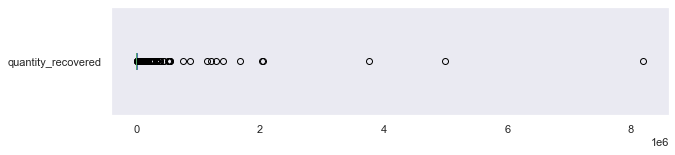

In [32]:
#Statistics regarding quantity recovered
quantity_stats=df['quantity_recovered'].describe()
quant_year=df.groupby(['start_year']).sum()['quantity_recovered']
print(quantity_stats)
# boxplot (=> check for outliers)
plt.figure(figsize=(10,2))
df.quantity_recovered.plot(kind='box', vert=False)
plt.grid()
plt.show()

Box plot shows to be inconclusive for this style of data as there is no relationship with the amount of food recalled.

start_year
2010     7503616.0
2011     3671317.0
2012     2194732.0
2013     2439528.0
2014     2147481.0
2015    10853021.0
2016     5979090.0
2017     4230260.0
2018     3479849.0
2019     7169895.0
2020      353967.0
2021     2513009.0
2022      159214.0
Name: quantity_recovered, dtype: float64


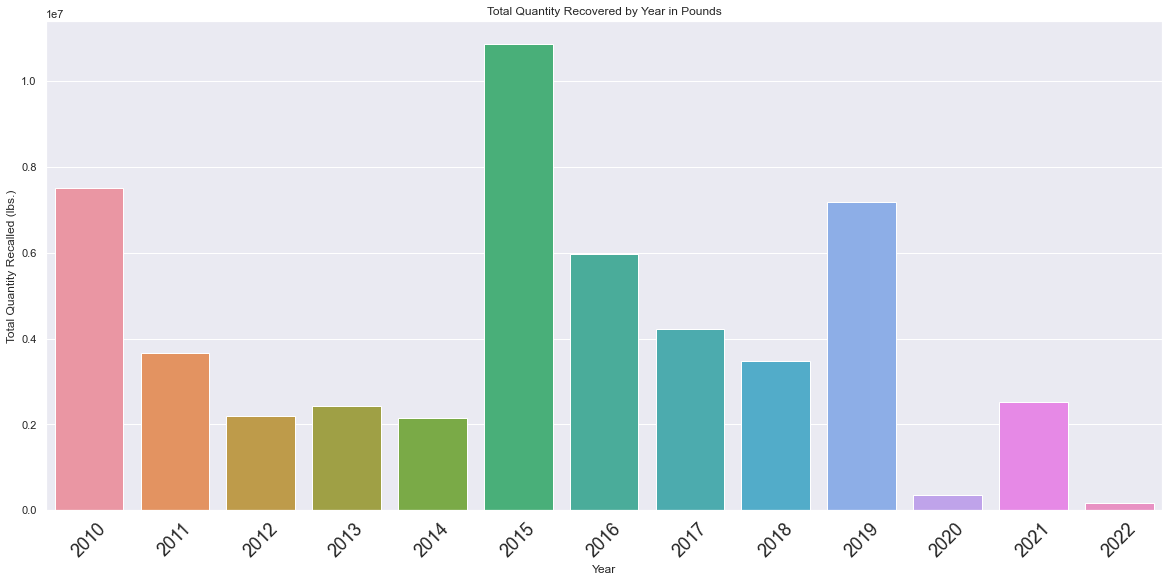

In [33]:
#Total quantity recovered in pounds by year
print(quant_year)
plt.figure(figsize=(20,9))
sns.barplot(data=df, x="start_year", y="quantity_recovered",estimator= sum, ci= None)
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Year")
plt.ylabel("Total Quantity Recalled (lbs.)")
plt.title("Total Quantity Recovered by Year in Pounds")
plt.show()

start_year
2010    107194.514286
2011     35643.854369
2012     26442.554217
2013     28040.551724
2014     23342.184783
2015     68690.006329
2016     44620.074627
2017     31335.259259
2018     28759.082645
2019     75472.578947
2020     11798.900000
2021     59833.547619
2022      8845.222222
Name: quantity_recovered, dtype: float64


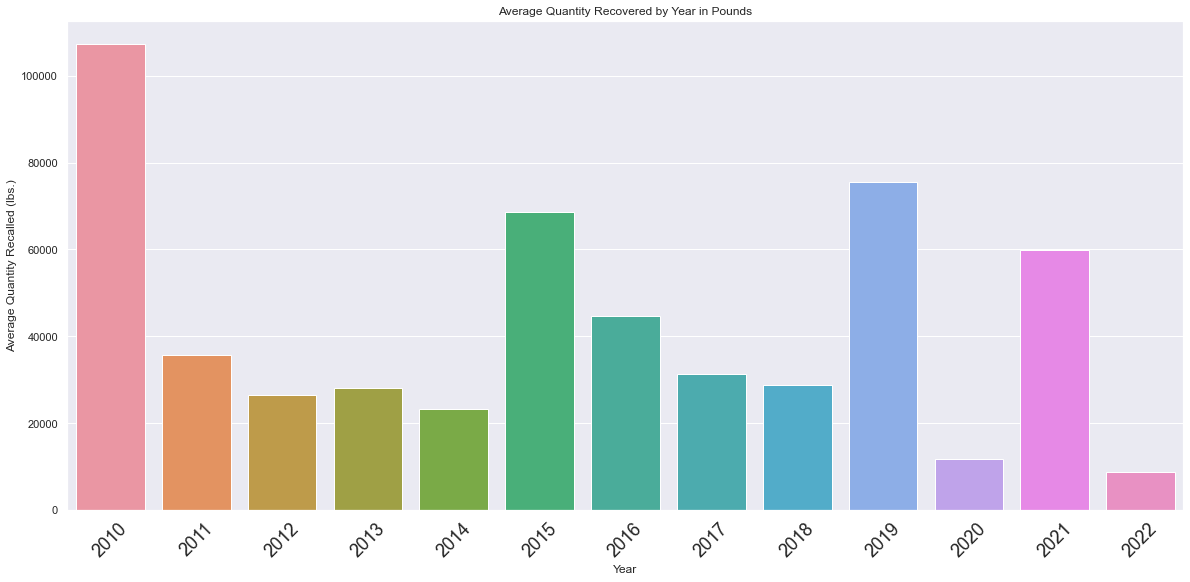

In [34]:
#Calculating the mean quantity recovered by each year
quant_mean=df.groupby(['start_year']).mean()['quantity_recovered']
print(quant_mean)
#Mean Quanitity Recovered by Year bar plot
plt.figure(figsize=(20,9))
sns.barplot(data=df, x="start_year", y="quantity_recovered",estimator= np.mean, ci= None)
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Year")
plt.ylabel("Average Quantity Recalled (lbs.)")
plt.title("Average Quantity Recovered by Year in Pounds")
plt.show()

May    136
Oct    130
Jan    127
Mar    119
Jul    113
Jun    112
Aug    111
Nov    104
Apr     99
Feb     97
Sep     96
Dec     94
Name: Month, dtype: int64


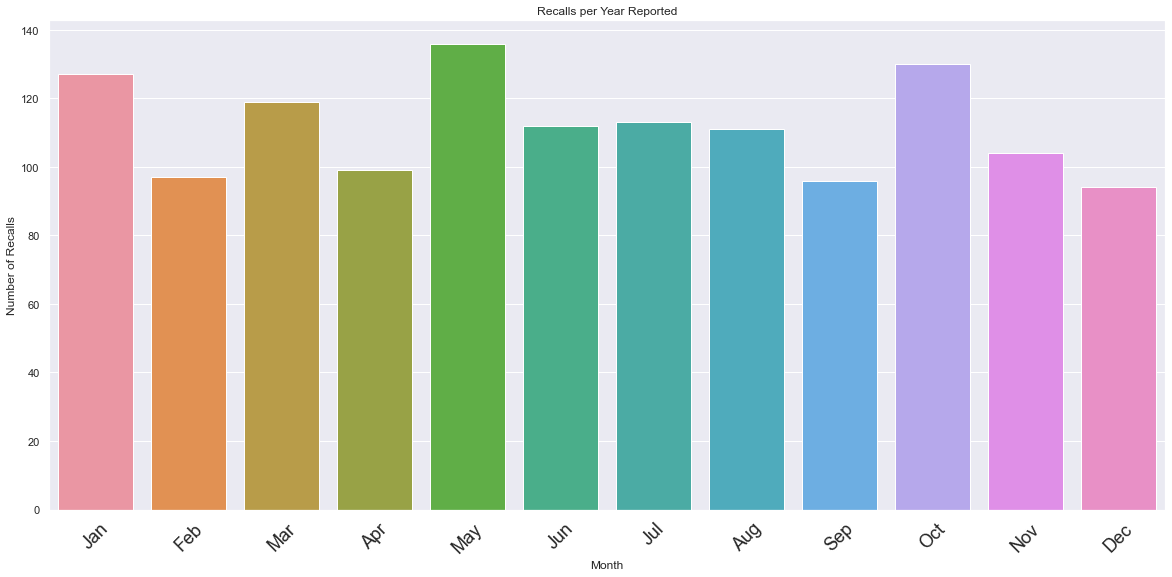

In [53]:
#Recalls filed by month                           
df['Month'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])
monthly= df['Month'].value_counts()
print(monthly)
#plot 
plt.figure(figsize=(20,9))
sns.countplot(x=df['Month'])
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Month")
plt.ylabel("Number of Recalls")
plt.title("Recalls per Year Reported")
plt.show()

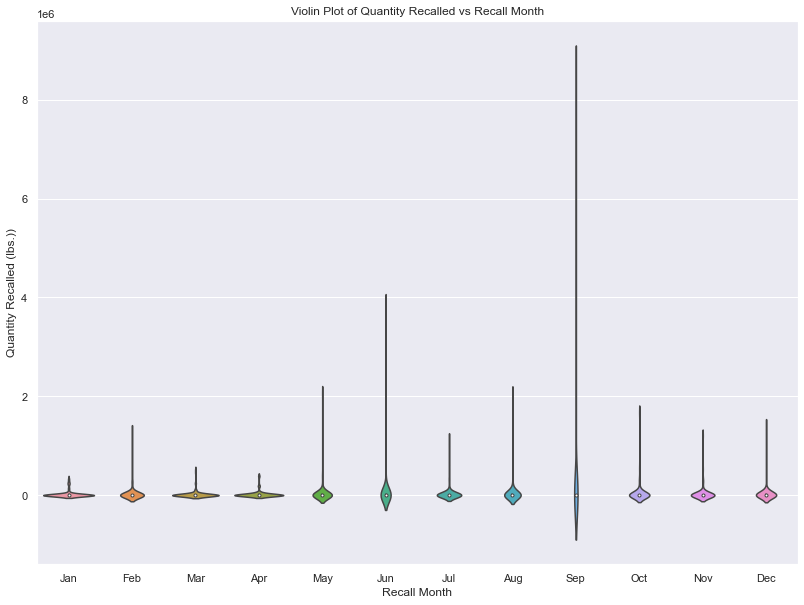

In [54]:
#Creating violin plot for amount recovered and starting month
plt.figure(figsize=[30,10])
plt.subplot(1,2,1)
sns.violinplot(data=df, x="Month", y="quantity_recovered")
plt.ylabel('Quantity Recalled (lbs.))')
plt.xlabel('Recall Month')
plt.title('Violin Plot of Quantity Recalled vs Recall Month')
plt.show()

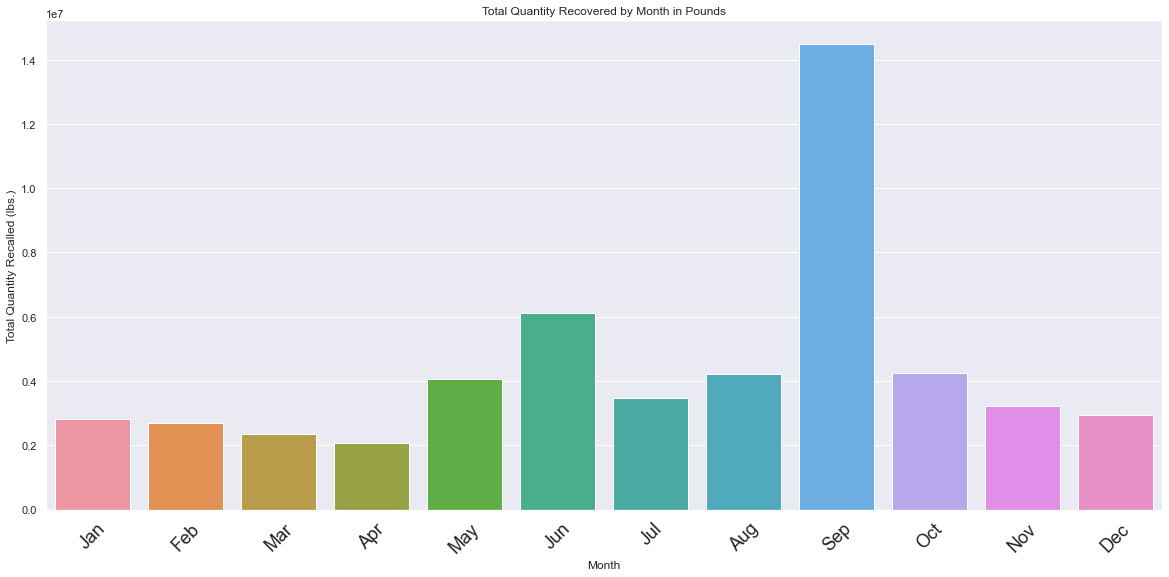

In [55]:
#bar plot for amount recovered and starting month
plt.figure(figsize=(20,9))
sns.barplot(data=df, x="Month", y="quantity_recovered",estimator= sum, ci= None)
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Month")
plt.ylabel("Total Quantity Recalled (lbs.)")
plt.title("Total Quantity Recovered by Month in Pounds")
plt.show()

In [15]:
#Quantity recovered by risk level
quant_risk=df.groupby(['risk_level']).sum()['quantity_recovered']
print(quant_risk)

risk_level
High        45877378.0
Low          5924153.0
Marginal      814947.0
Name: quantity_recovered, dtype: float64


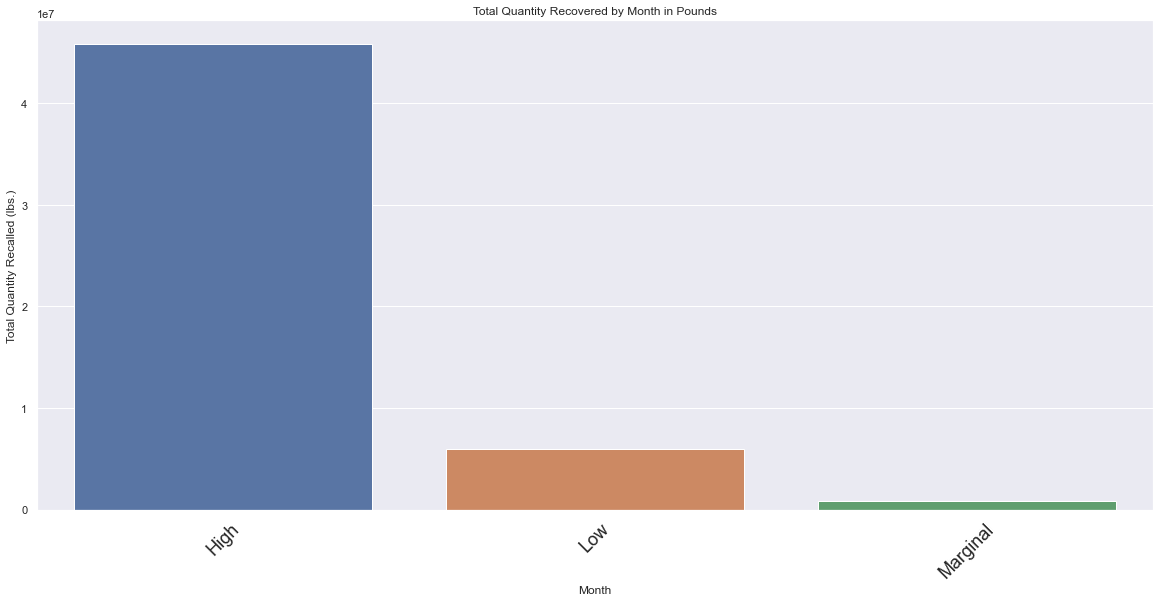

In [16]:
#Bar Plot quantity recovered by risk level
plt.figure(figsize=(20,9))
sns.barplot(data=df, x="risk_level", y="quantity_recovered",estimator= sum, ci= None)
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Risk Level")
plt.ylabel("Total Quantity Recalled (lbs.)")
plt.title("Total Quantity Recovered by Risk Level in Pounds")
plt.show()

High        896
Low         313
Marginal     29
Name: risk_level, dtype: int64


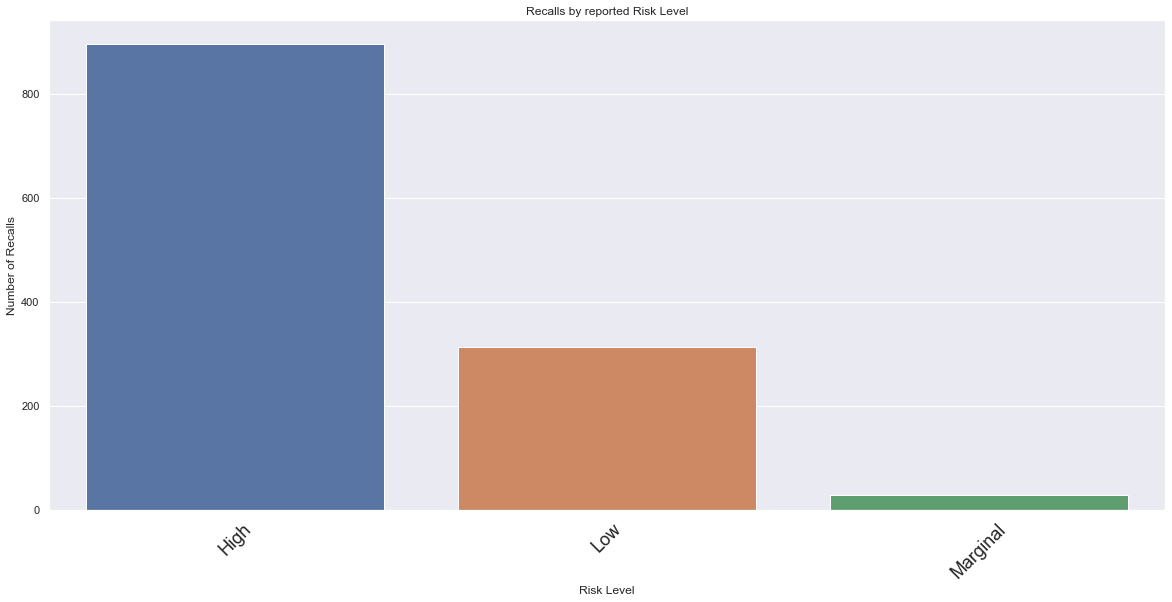

In [23]:
#Analysis of the amount of recalls by risk level
risk= df["risk_level"]
print(risk.value_counts())
#plot 
plt.figure(figsize=(20,9))
sns.countplot(x=df['risk_level'])
plt.xticks(rotation=45, fontsize=18)
plt.xlabel("Risk Level")
plt.ylabel("Number of Recalls")
plt.title("Recalls by reported Risk Level")
plt.show()

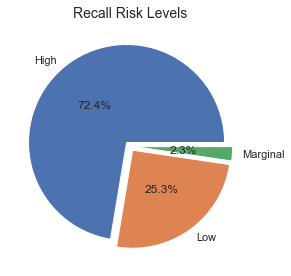

In [24]:
# visial representation of risk frequency using a pie chart 
labels= df['risk_level'].value_counts().index
plt.pie(x=df['risk_level'].value_counts().values, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Recall Risk Levels", fontsize=14);
plt.tight_layout();

High risk recalls make up a significant amount of the reports